<a href="https://colab.research.google.com/github/tchild1/Football-ML/blob/main/LinearRegression_FB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Regression

IMPORTS

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.impute import SimpleImputer

In [ ]:
# Getting just q1 data
games_df = pd.read_csv('cleanedCompiledData (1).csv')
games_df.head()
X_q1 = games_df.filter(regex='q1$')
y = games_df['points']
results = {}

In [ ]:
def fit_and_predict(X_train, y_train, X_test, y_test, linReg):
  linReg.fit(X_train, y_train)
  train_score = linReg.score(X_train, y_train)
  test_score = linReg.score(X_test, y_test)
  train_mae = mean_absolute_error(y_train, linReg.predict(X_train))
  test_mae = mean_absolute_error(y_test, linReg.predict(X_test))
  print(f"Train Score: {train_score}")
  print(f"Test Score: {test_score}")
  print(f"Train MAE: {train_mae}")
  print(f"Test MAE: {test_mae}")
  return (train_score, test_score, train_mae, test_mae)


### 1st Quarter

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_q1, y, test_size=0.2)
reg = LinearRegression().fit(X_train, y_train)
linReg = LinearRegression()
results["Q1"] = fit_and_predict(X_train, y_train, X_test, y_test, linReg)

Train Score: 0.18817184137077891
Test Score: 0.18423062216550923
Train MAE: 7.445492951343515
Test MAE: 7.6696572267483205


MAE is off by about 7.5 points using stats from just quarter 1. Train and test accuracies are pretty similar

### First Half Stats

In [ ]:
q1_q2_columns = games_df.filter(regex='q[12]$')
X_train, X_test, y_train, y_test = train_test_split(q1_q2_columns, y, test_size=0.2)
linReg = LinearRegression()

results["Q1Q2"] = fit_and_predict(X_train, y_train, X_test, y_test, linReg)

Train Score: 0.3608553183860359
Test Score: 0.34148277925350257
Train MAE: 6.629364757354426
Test MAE: 6.634130584550076


First half stats are more accurate, with average MAE being around 6.7 points. Train and test scores are also pretty similar

### Third Quarter Stats


In [ ]:
q1_q2_q3_columns = games_df.filter(regex='q[123]$')
X_train, X_test, y_train, y_test = train_test_split(q1_q2_q3_columns, y, test_size=0.2)
linReg = LinearRegression()

results["Q1Q2Q3"] = fit_and_predict(X_train, y_train, X_test, y_test, linReg)

Train Score: 0.47547276300390584
Test Score: 0.45640860929669413
Train MAE: 5.965129825160897
Test MAE: 6.1025752297078535


### Full Game Stats


In [ ]:

q1_q2_q3_q4_columns = games_df.filter(regex='q[1234]$')

X_train, X_test, y_train, y_test = train_test_split(q1_q2_q3_q4_columns, y, test_size=0.2)
linReg = LinearRegression()

results["Q1Q2Q3Q4"] = fit_and_predict(X_train, y_train, X_test, y_test, linReg)

   fourth_down_attempts_q1  fourth_down_attempts_q2  fourth_down_attempts_q3  \
0                        0                        1                        1   
1                        1                        1                        1   
2                        3                        2                        3   
3                        0                        2                        2   
4                        3                        2                        2   

   fourth_down_attempts_q4     game_id  points  third_down_attempts_q1  \
0                        4  2021092612      30                       0   
1                        2  2021092612      17                       4   
2                        2  2021101008      22                       4   
3                        3  2021101008      33                       2   
4                        2  2021101706      38                       2   

   third_down_attempts_q2  third_down_attempts_q3  third_down_attempts_q4 

In [ ]:
games_df_clean = games_df[games_df.columns.drop(games_df.filter(regex='^num').columns)]
games_df_clean = games_df_clean.drop('game_id', axis=1)
games_df_clean = games_df_clean.drop('points', axis=1)

clean_q1_q2_columns = [col for col in games_df_clean.columns if 'q3' not in col and 'q4' not in col and 'total' not in col]
clean_q1_q2_df = games_df_clean[clean_q1_q2_columns]

clean_q1_columns = games_df_clean.filter(regex='q1$')


games_yards = games_df.loc[:, games_df.columns.str.contains(r'yards', case=False)]

missing_values = games_df.isna().sum()

missing_columns = missing_values[missing_values > 0]

imputer = SimpleImputer(strategy='mean')

# # Fit the imputer to your training data and transform it.
X_train, X_test, y_train, y_test = train_test_split(games_df_clean, y, test_size=0.2)

X_train = imputer.fit_transform(X_train)
X_test = imputer.fit_transform(X_test)

# results["cleaned"] = fit_and_predict(X_train, y_train, X_test, y_test, linReg)

X_train, X_test, y_train, y_test = train_test_split(clean_q1_q2_df, y, test_size=0.2)

X_train = imputer.fit_transform(X_train)
X_test = imputer.fit_transform(X_test)
print()
print("Using just a few columns")
for col in clean_q1_q2_columns:
  print(col)
print()
results["firsthalfClean"] = fit_and_predict(X_train, y_train, X_test, y_test, linReg)


Using just a few columns
fourth_down_attempts_q1
fourth_down_attempts_q2
third_down_attempts_q1
third_down_attempts_q2
yards_allowed_q1
yards_allowed_q2
yards_moved_q1
yards_moved_q2

Train Score: 0.30287193937145707
Test Score: 0.2693994659501061
Train MAE: 6.986057723034091
Test MAE: 6.801416903860528


Using just a few of the featurse, 3rd down attempts, 4th down attempts, yards allowed, and yards moved, results are actually still pretty close to the other first half stats

## Plotting


In [ ]:
train_scores = [result[0] for result in results.values()]
test_scores = [result[1] for result in results.values()]
test_df = pd.DataFrame(test_scores, index=results.keys(), columns=["Test Score"])
mae_scores = [result[2] for result in results.values()]
testMAE = [result[3] for result in results.values()]
mae_df = pd.DataFrame(mae_scores, index=results.keys(), columns=["Test MAE"])

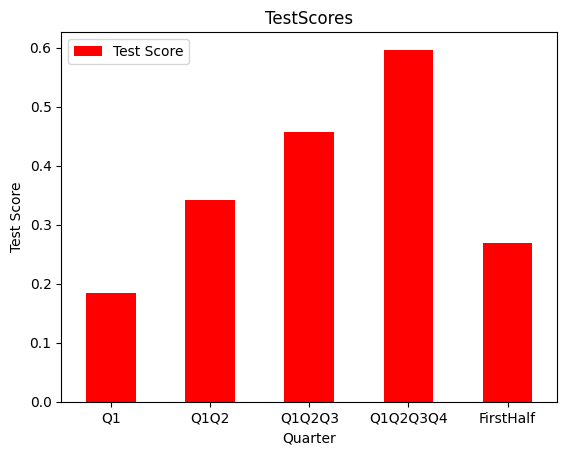

In [ ]:
test_df.plot(kind='bar', color='red')
plt.title("TestScores")
plt.ylabel("Test Score")
plt.xlabel("Quarter")
plt.xticks(np.arange(5), ["Q1", "Q1Q2", "Q1Q2Q3", "Q1Q2Q3Q4", "FirstHalf" ], rotation=0)
plt.show()

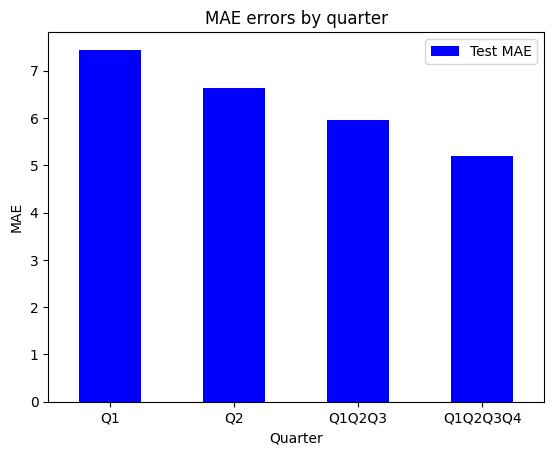

In [ ]:
mae_df.plot(kind='bar', color='blue')
plt.title("MAE errors by quarter")
plt.ylabel("MAE")
plt.xlabel("Quarter")
plt.xticks(np.arange(4), ["Q1", "Q2", "Q1Q2Q3", "Q1Q2Q3Q4"], rotation=0)
plt.show()